In [2]:
from hmmlearn import hmm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
n = 6  # 6个隐藏状态

data = pd.read_csv('1.csv', index_col=0)
volume = data['volume']
close = data['close']

logDel = np.log(np.array(data['high'])) - np.log(np.array(data['low']))
logRet_1 = np.array(np.diff(np.log(close)))
logRet_5 = np.log(np.array(close[5:])) - np.log(np.array(close[:-5]))
logVol_5 = np.log(np.array(volume[5:])) - np.log(np.array(volume[:-5]))

# 保持所有的数据长度相同
logDel = logDel[5:]
logRet_1 = logRet_1[4:]
close = close[5:]

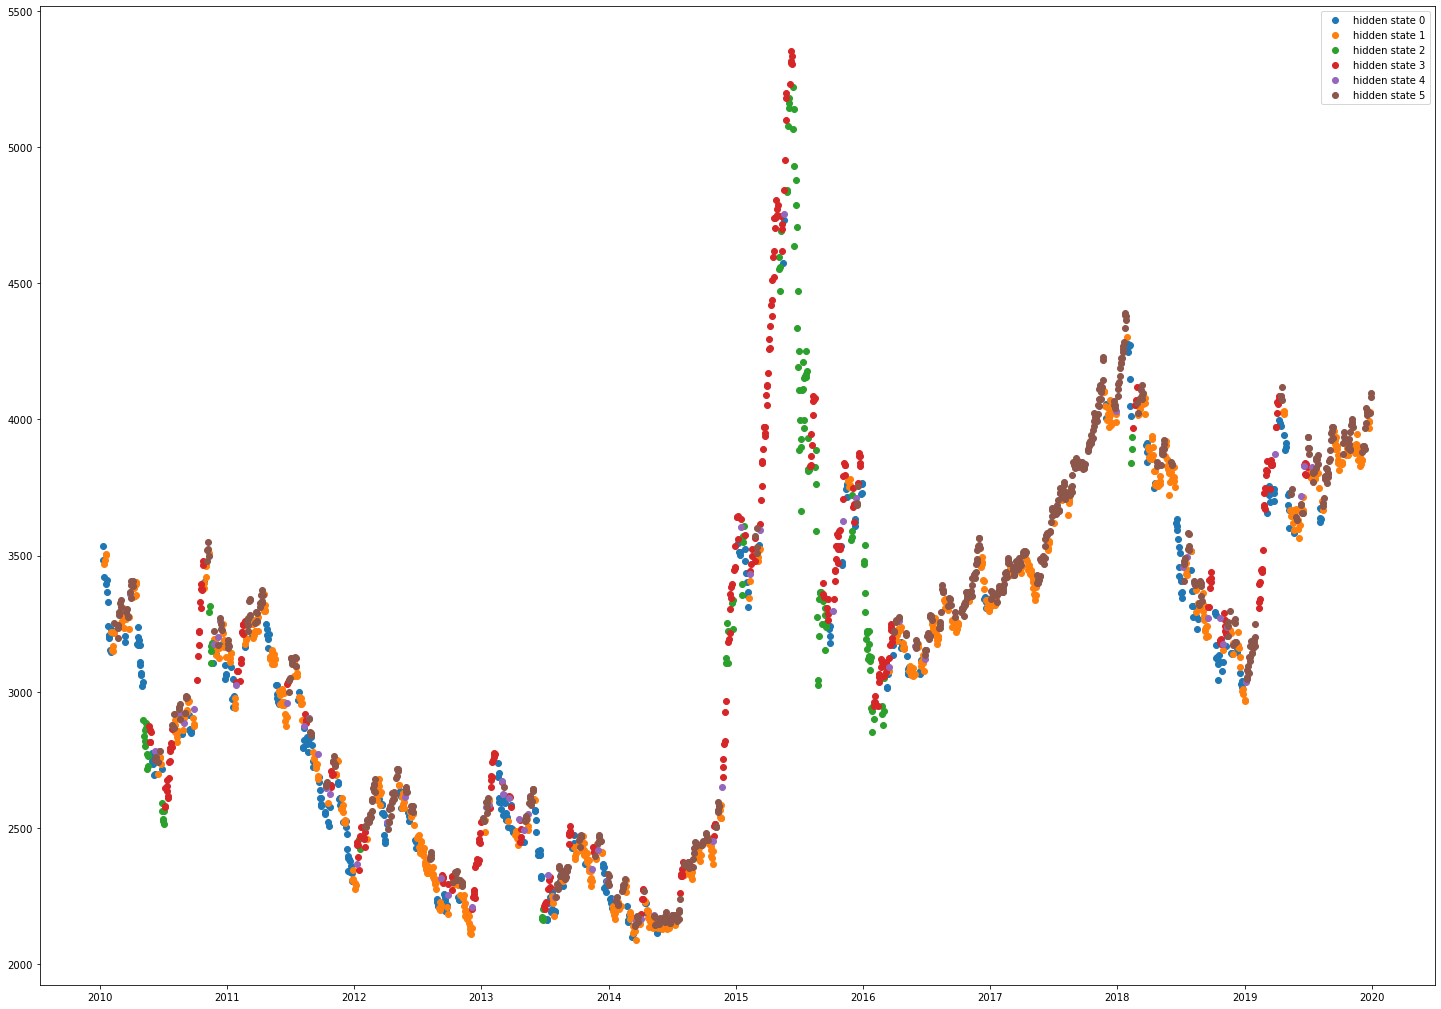

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Date = pd.to_datetime(data.index[5:])
A = np.column_stack([logDel, logRet_5, logVol_5])

model = hmm.GaussianHMM(n_components=n, covariance_type="full", n_iter=2000).fit(A)
hidden_states = model.predict(A)

plt.figure(figsize=(25, 18))
for i in range(n):
    pos = (hidden_states == i)
    plt.plot_date(Date[pos], close[pos], 'o', label='hidden state %d' % i, lw=2)
    plt.legend()
plt.show()

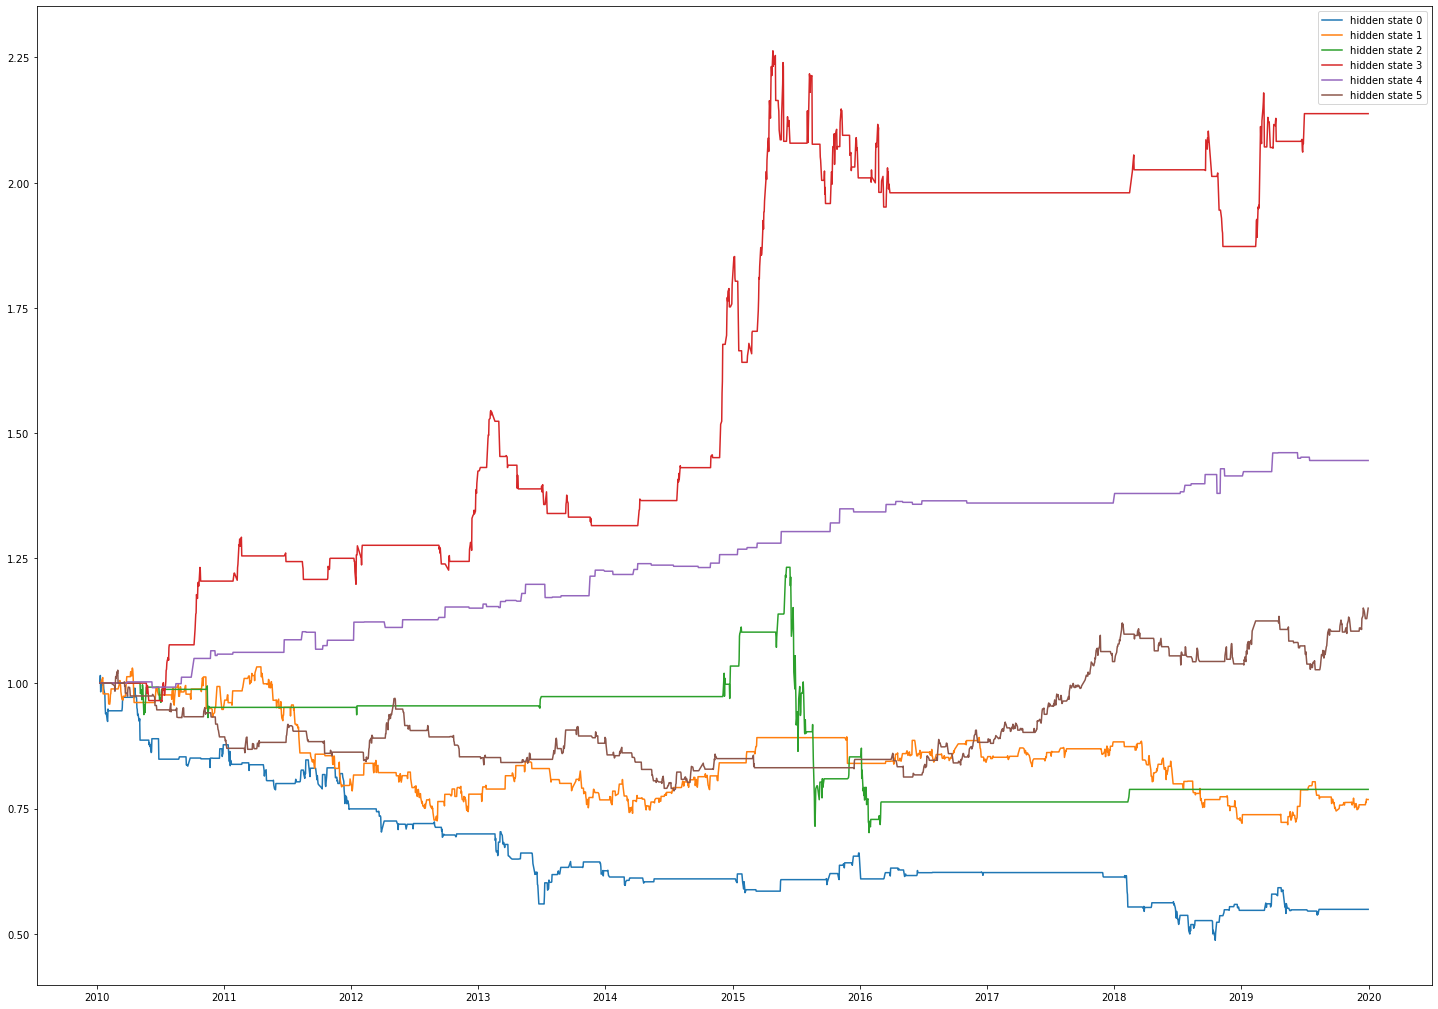

In [4]:
res = pd.DataFrame({'Date': Date, 'logReg_1': logRet_1, 'state': hidden_states}).set_index('Date')
series = res.logReg_1

templist = []
plt.figure(figsize=(25, 18))
for i in range(n):
    pos = (hidden_states == i)
    pos = np.append(1, pos[:-1])
    res['state_ret%d' % i] = series.multiply(pos)
    data_i = np.exp(res['state_ret%d' % i].cumsum())
    templist.append(data_i[-1])
    plt.plot_date(Date, data_i, '-', label='hidden state %d' % i)
    plt.legend()
plt.show()

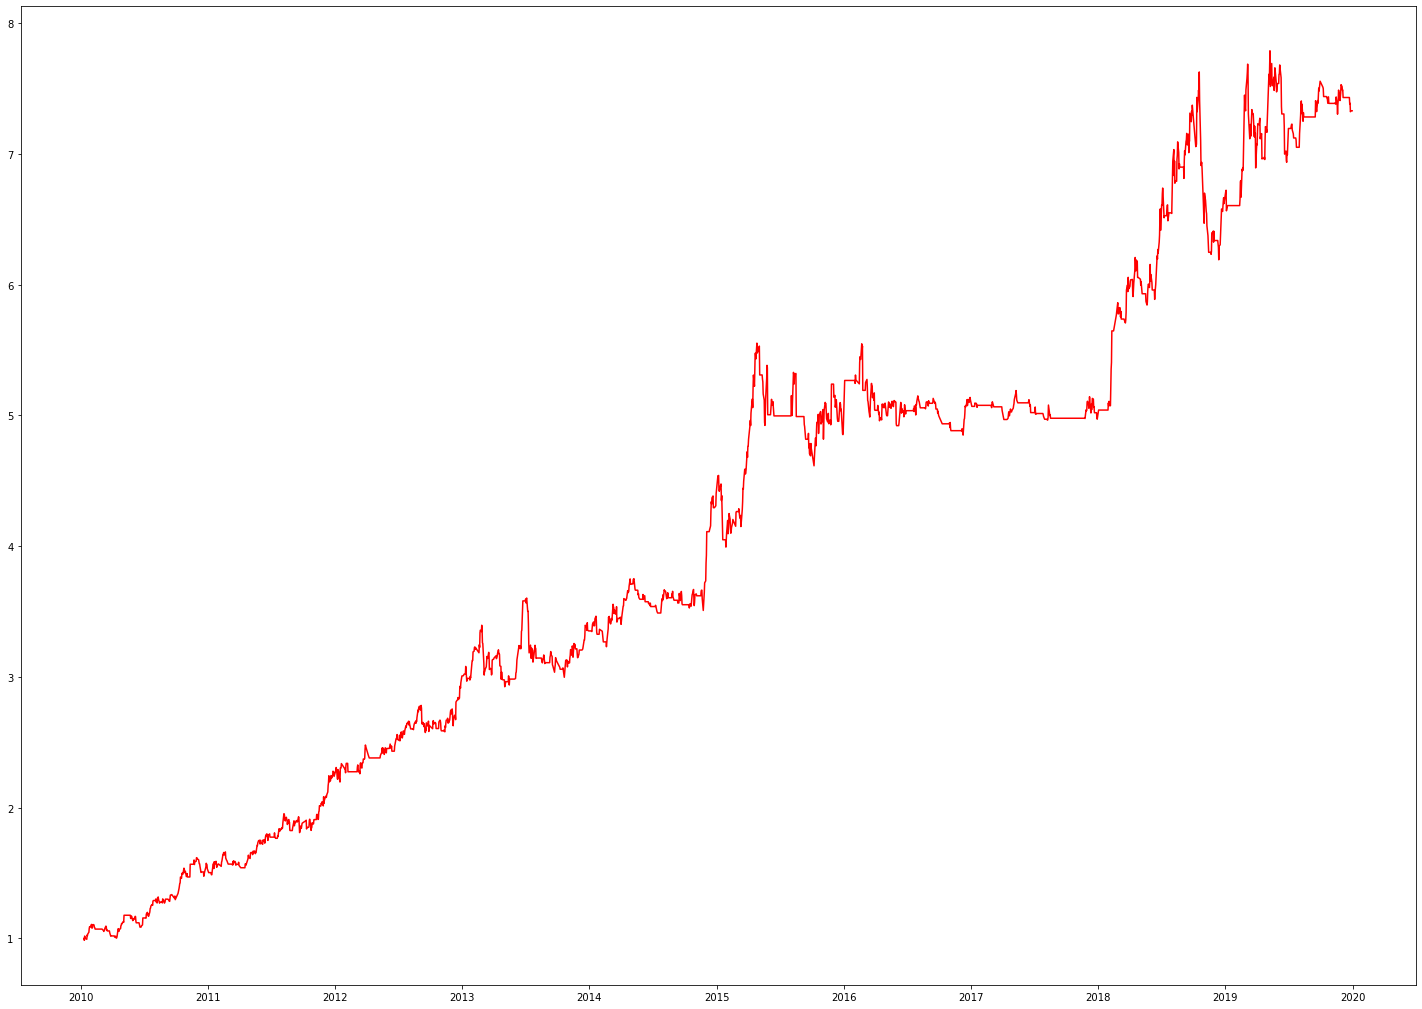

In [5]:
templist = np.array(templist).argsort()
long = (hidden_states == templist[-1]) + (hidden_states == templist[-2])  # 买入
short = (hidden_states == templist[0]) + (hidden_states == templist[1])  # 卖出
long = np.append(0, long[:-1])
short = np.append(0, short[:-1])

plt.figure(figsize=(25, 18))
res['ret'] = series.multiply(long) - series.multiply(short)
plt.plot_date(Date, np.exp(res['ret'].cumsum()), 'r-')
plt.show()

In [6]:
list1 = hidden_states.tolist()

In [7]:
list1.append(None)

In [8]:
len(list1)

2427

In [9]:
def transition(k):
    a = 0
    b = 0
    c = 0
    d = 0
    e = 0
    f = 0
    for i in range(len(list1)-1):
        if list1[i] == k:
            if list1[i+1] == None:
                continue
            elif list1[i+1] == 0:
                a += 1
            elif list1[i+1] == 1:
                b+=1
            elif list1[i+1] == 2:
                c+=1
            elif list1[i+1] == 3:
                d+=1
            elif list1[i+1] == 4:
                e+=1
            elif list1[i+1] == 5:
                f+=1
    return [a/(a+b+c+d+e+f), b/(a+b+c+d+e+f), c/(a+b+c+d+e+f), d/(a+b+c+d+e+f), e/(a+b+c+d+e+f), f/(a+b+c+d+e+f)]

In [17]:
for i in range(6):
    print(transition(i))

[0.7690355329949239, 0.15228426395939088, 0.012690355329949238, 0.0025380710659898475, 0.06345177664974619, 0.0]
[0.06639566395663957, 0.8008130081300813, 0.0027100271002710027, 0.0, 0.06368563685636856, 0.06639566395663957]
[0.007042253521126761, 0.0, 0.8802816901408451, 0.11267605633802817, 0.0, 0.0]
[0.07692307692307693, 0.0, 0.027472527472527472, 0.8598901098901099, 0.0, 0.03571428571428571]
[0.013888888888888888, 0.0, 0.0, 0.4166666666666667, 0.0, 0.5694444444444444]
[0.015384615384615385, 0.12167832167832168, 0.0, 0.005594405594405594, 0.0, 0.8573426573426574]


In [10]:
mat = []
for i in range(6):
    mat.append(transition(i))
    
print(mat)

[[0.7690355329949239, 0.15228426395939088, 0.012690355329949238, 0.0025380710659898475, 0.06345177664974619, 0.0], [0.06639566395663957, 0.8008130081300813, 0.0027100271002710027, 0.0, 0.06368563685636856, 0.06639566395663957], [0.007042253521126761, 0.0, 0.8802816901408451, 0.11267605633802817, 0.0, 0.0], [0.07692307692307693, 0.0, 0.027472527472527472, 0.8598901098901099, 0.0, 0.03571428571428571], [0.013888888888888888, 0.0, 0.0, 0.4166666666666667, 0.0, 0.5694444444444444], [0.015384615384615385, 0.12167832167832168, 0.0, 0.005594405594405594, 0.0, 0.8573426573426574]]


In [11]:
i = 2 
state = []
count = 200000
np.random.seed(666)
ran = np.random.random_sample([count])

for t in range(count):
    r = ran[t]
    if r <= mat[i][0]:
        i = 0
    elif mat[i][0] <= r <= mat[i][0] + mat[i][1]:
        i = 1
    elif mat[i][0] + mat[i][1] <= r <= mat[i][0] + mat[i][1] + mat[i][2]:
        i = 2
    elif mat[i][0] + mat[i][1] + mat[i][2] <= r <= mat[i][0] + mat[i][1] + mat[i][2] + mat[i][3]:
        i = 3
    elif mat[i][0] + mat[i][1] + mat[i][2] + mat[i][3] <= r <= mat[i][0] + mat[i][1] + mat[i][2] + mat[i][3] + mat[i][4]:
        i = 4
    else:
        i = 5
    state.append(i)

In [12]:
countDict = dict()
proportitionDict = dict()
 
for i in range(6):
    countDict[i] = state.count(i)
    proportitionDict[i] = state.count(i)/len(state)

print(countDict)
print(proportitionDict)

{0: 31700, 1: 61176, 2: 11949, 3: 29161, 4: 5831, 5: 60183}
{0: 0.1585, 1: 0.30588, 2: 0.059745, 3: 0.145805, 4: 0.029155, 5: 0.300915}


In [13]:
Astate = state[150000:]

countDict1 = dict()
proportitionDict1 = dict()

for i in range(6):
    countDict1[i] = Astate.count(i)
    proportitionDict1[i] = Astate.count(i)/len(Astate)

print(countDict1)
print(proportitionDict1)

{0: 8043, 1: 15416, 2: 3010, 3: 7538, 4: 1485, 5: 14508}
{0: 0.16086, 1: 0.30832, 2: 0.0602, 3: 0.15076, 4: 0.0297, 5: 0.29016}


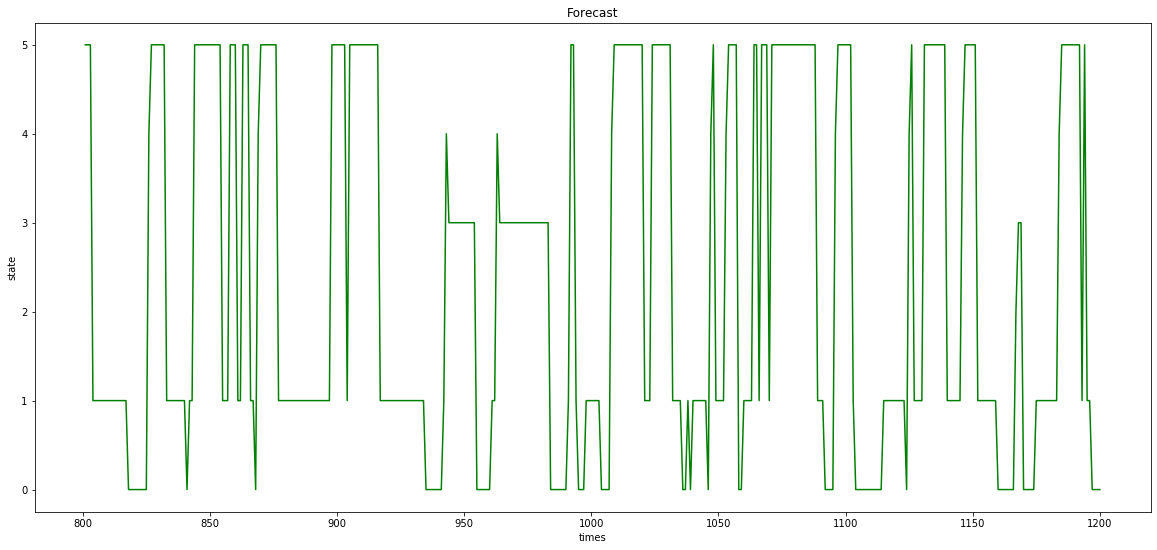

In [14]:
plt.figure(figsize=(20, 9))
plt.title('Forecast')
plt.plot(range(801,1201), state[800:1200], color='green')
plt.xlabel('times')
plt.ylabel('state')
plt.show()

In [4]:
np.random.randint(17, 20, size=(9,4))

array([[19, 19, 19, 17],
       [19, 17, 17, 18],
       [18, 18, 19, 18],
       [19, 17, 17, 18],
       [17, 19, 18, 18],
       [18, 19, 18, 19],
       [19, 17, 17, 17],
       [19, 17, 17, 18],
       [18, 17, 17, 17]])